In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header,compare

HTML(header())

# Rank based filters

## Rank vs. weighted sum

If the local processing consists in something different from a weighted sum of neighboor pixesl, one can speak of non-linear filters.

One important category of non-linear filters are the *rank filters*.

These filters use the ranked levels from the neighborhood. 

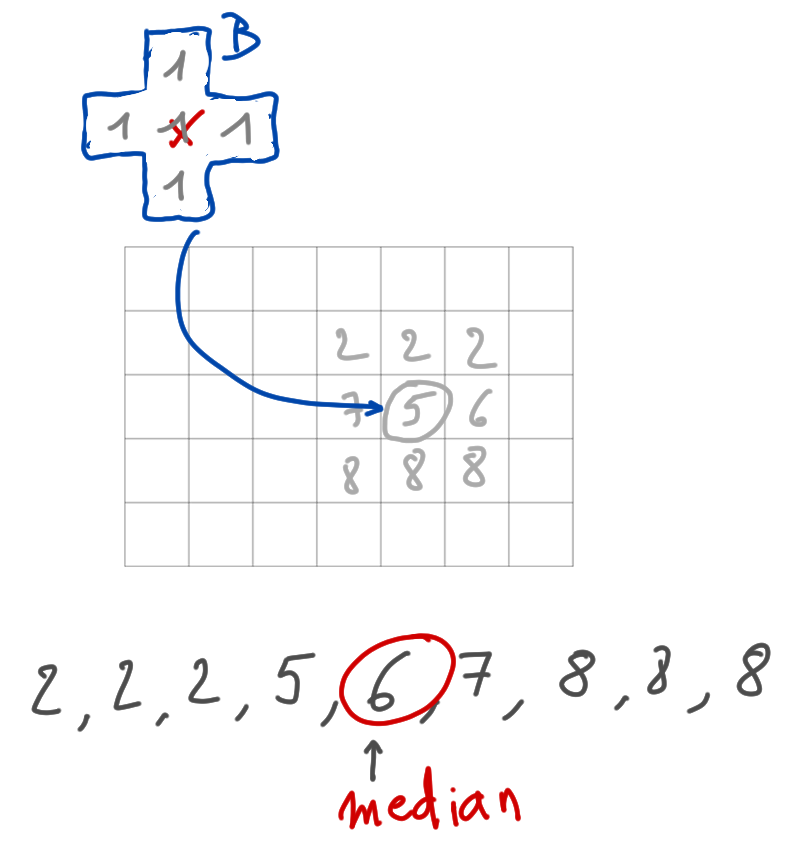

In [2]:
Image('http://homepages.ulb.ac.be/~odebeir/data/median.png')

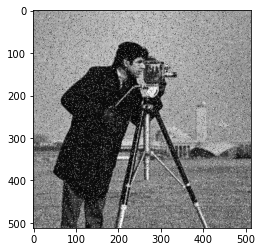

In [3]:
from skimage.data import camera
import matplotlib.pyplot as plt
import numpy as np

# Salt and pepper noise filtering
ima = camera()
plt.imshow(ima,cmap=plt.cm.gray)

n = np.random.random(ima.shape)

noised_ima = ima.copy()

noised_ima[n<.05] = 0
noised_ima[n>.95] = 255

plt.imshow(noised_ima,cmap=plt.cm.gray);

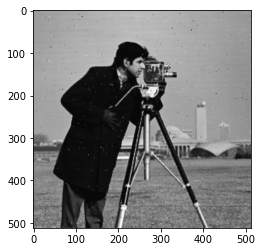

In [4]:
from skimage.filters import rank as skr
from skimage.morphology import disk

filtered_im = skr.median(noised_ima,disk(1))

plt.imshow(filtered_im,cmap=plt.cm.gray);


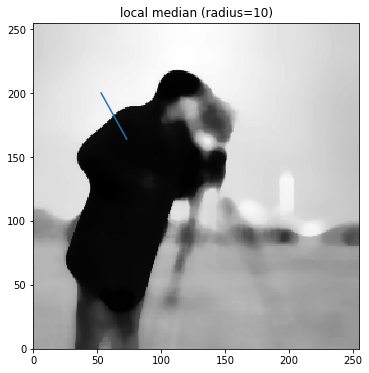

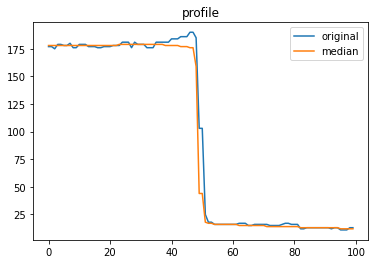

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import ndimage

from skimage.data import camera
import skimage.filters.rank as skr
from skimage.morphology import disk

def profile(ima,p0,p1,num):
    n = np.linspace(p0[0],p1[0],num)
    m = np.linspace(p0[1],p1[1],num)
    return [n,m,ndimage.map_coordinates(ima, [m,n], order=0)]

im = camera()[-1::-2,::2]

#filtered version
rank = skr.median(im,disk(10))
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank] = profile(rank,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[6,6])
plt.imshow(rank,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('local median (radius=10)')
plt.plot(x,y)
plt.gca().set_xlim((0,255))
plt.gca().set_ylim((0,255))



fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank,label='median')
plt.title('profile')
plt.legend();


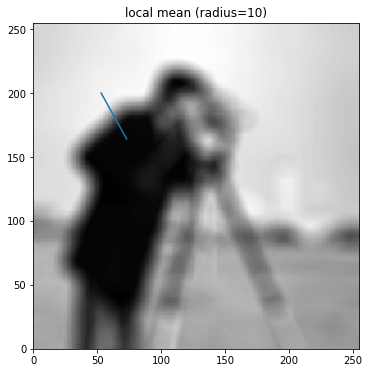

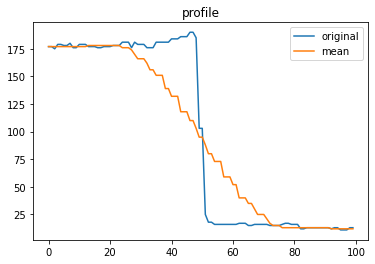

In [6]:
#filtered version
mean = skr.mean(im,disk(10))
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,pmean] = profile(mean,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[6,6])
plt.imshow(mean,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('local mean (radius=10)')
plt.plot(x,y)
plt.gca().set_xlim((0,255))
plt.gca().set_ylim((0,255))

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(pmean,label='mean')
plt.title('profile')
plt.legend();


Question:
* what can we conclude about the border sharpness of the filtered image between the linear smoothing and the median filter?

## Local histogram method



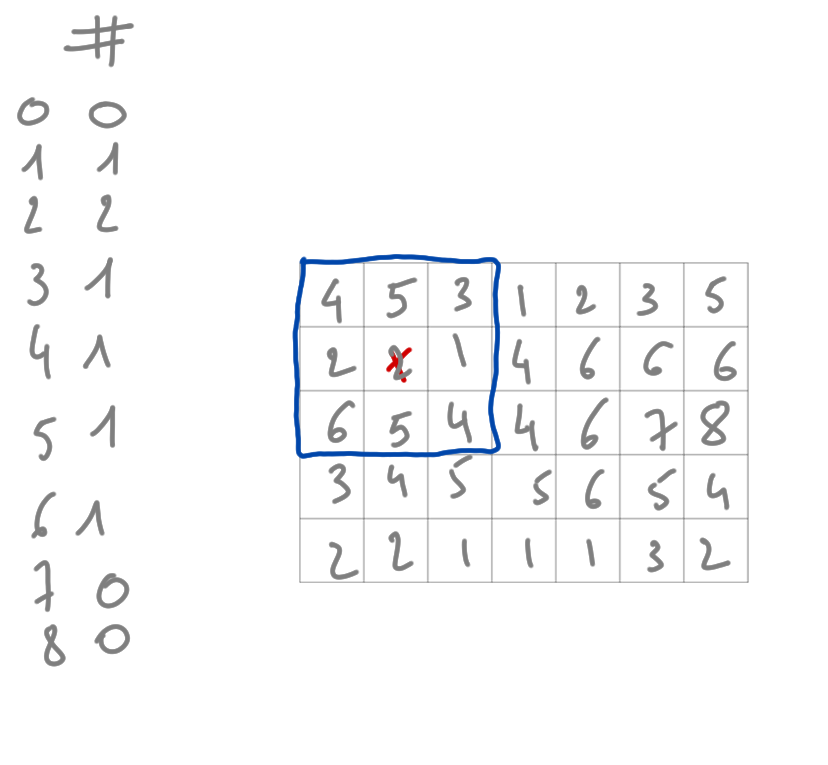

In [7]:
Image('http://homepages.ulb.ac.be/~odebeir/data/histo1.png')

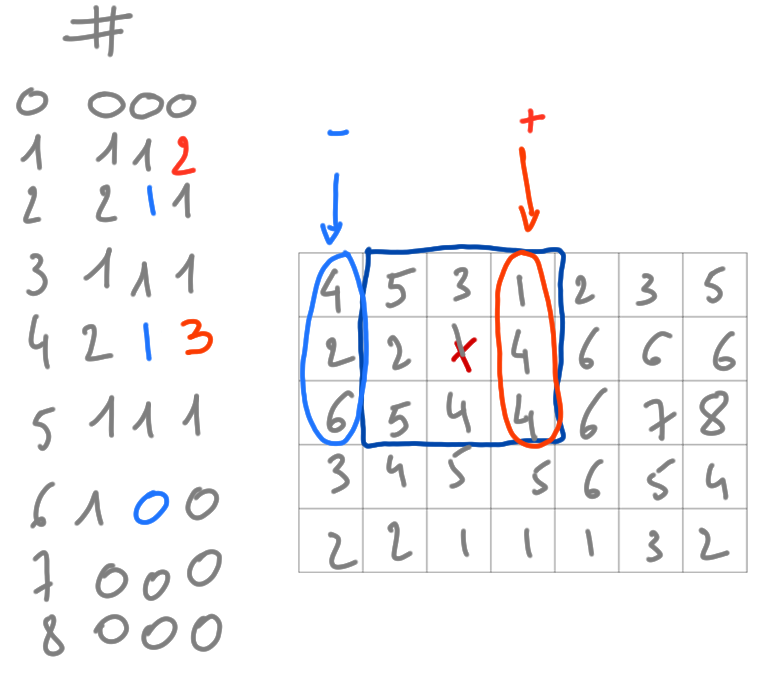

In [8]:
Image('http://homepages.ulb.ac.be/~odebeir/data/histo2.png')

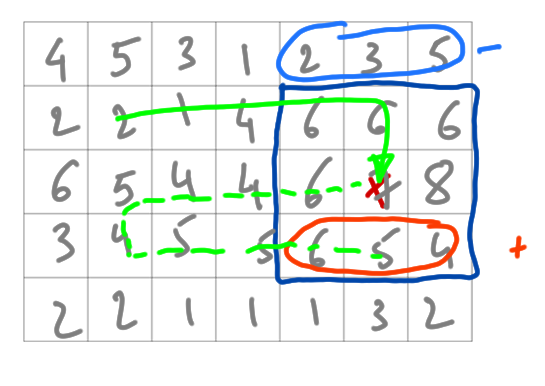

In [9]:
Image('http://homepages.ulb.ac.be/~odebeir/data/histo3.png')

## Local maximum, local minimum

Local minimum value and local maximum value are special case of the ranked gray levels.

The figure bellow illustrates the effect of respectively replacing the pixel:
* by the highest value of its neighboorhood, the local maximum, 
* by the lowest value of its neighboorhood, the local minimum.

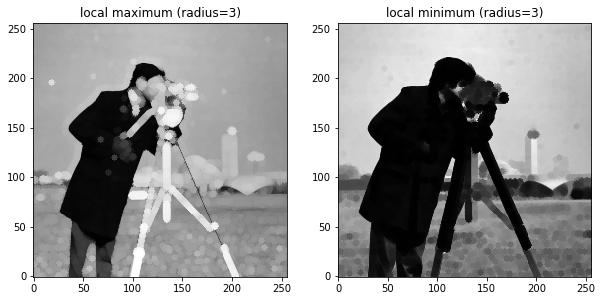

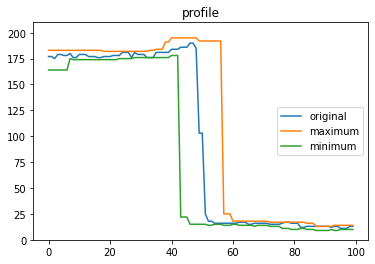

In [10]:
#filtered version
radius = 3
selem = disk(radius)
rank1 = skr.maximum(im,selem)
rank2 = skr.minimum(im,selem)
rank3 = skr.gradient(im,selem)
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank1] = profile(rank1,(53,200),(73,164),100)
[x,y,prank2] = profile(rank2,(53,200),(73,164),100)
[x,y,prank3] = profile(rank3,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(rank1,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('local maximum (radius=%d)'%radius)
plt.subplot(1,2,2)
plt.imshow(rank2,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('local minimum (radius=%d)'%radius)

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank1,label='maximum')
plt.plot(prank2,label='minimum')
plt.title('profile')
plt.gca().set_ylim([0,210])
plt.legend(loc=5);

Question:
* How to compute borders using local maximum and local minimum ?

## Local contrast enhancement
### Local contrast equalization

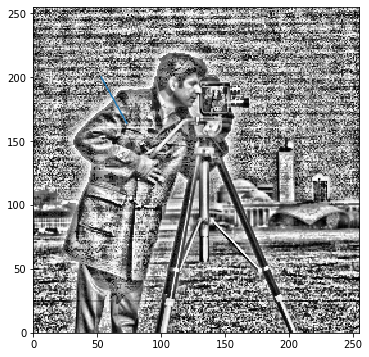

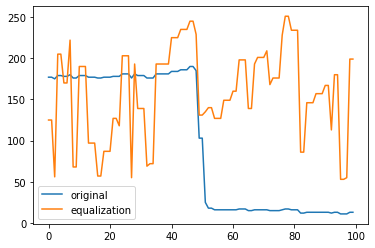

In [11]:
#local equalization
rank = skr.equalize(im,disk(10))
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank] = profile(rank,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[6,6])
plt.imshow(rank,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)
plt.gca().set_xlim((0,255))
plt.gca().set_ylim((0,255))


fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank,label='equalization')
plt.legend();

Question:
* How to compute an histogram equalization?

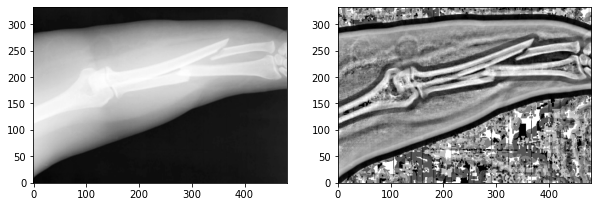

In [12]:
#local auto-level
from skimage.io import imread
ima = imread('http://homepages.ulb.ac.be/~odebeir/data/bones.png')
rank = skr.autolevel(ima,disk(10))


compare(ima,rank)


### Local autolevel (with percentile)

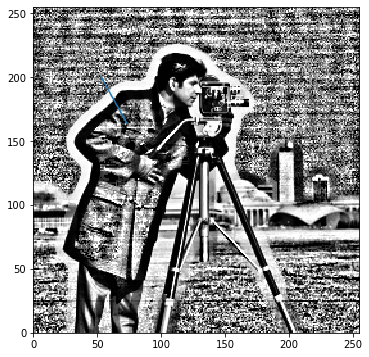

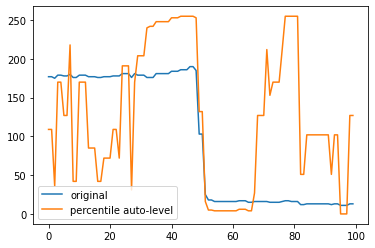

In [13]:
#local soft autolevel
rank = skr.autolevel_percentile(im,disk(10),p0=.1,p1=.9)
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,p_rank] = profile(rank,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[6,6])
plt.imshow(rank,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)
plt.gca().set_xlim((0,255))
plt.gca().set_ylim((0,255))


fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(p_rank,label='percentile auto-level')
plt.legend();


### Local morphological contrast enhancement

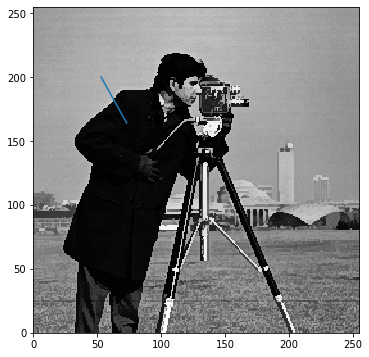

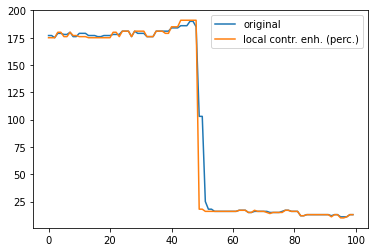

In [14]:
#local soft autolevel
rank = skr.enhance_contrast_percentile(im,disk(2),p0=.1,p1=.9)
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank] = profile(rank,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[6,6])
plt.imshow(rank,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)
plt.gca().set_xlim((0,255))
plt.gca().set_ylim((0,255))


fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank,label='local contr. enh. (perc.)')
plt.legend();


## Local threshold

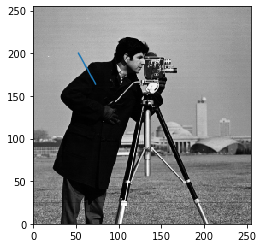

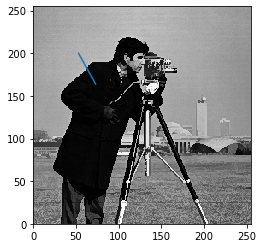

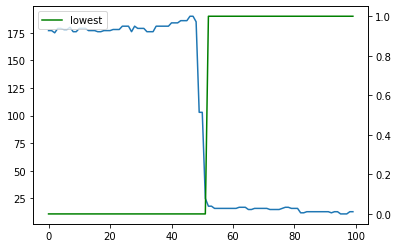

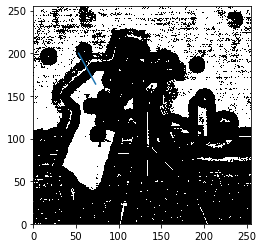

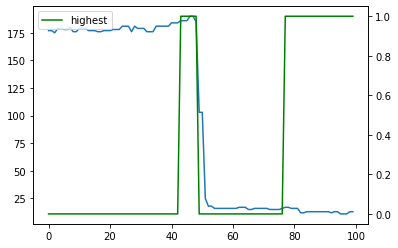

In [15]:
p0 = (53,200)
p1 =(73,164)

[x,y,p] = profile(im, p0, p1,100)
[x,y,prank] = profile(rank, p0, p1,100)

fig = plt.figure(0)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)
plt.gca().set_xlim((0,255))
plt.gca().set_ylim((0,255))

fig = plt.figure(1)
plt.imshow(rank,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)
plt.gca().set_xlim((0,255))
plt.gca().set_ylim((0,255))


low = im<=(skr.minimum(im,disk(10))+10)
[x,y,p] = profile(im, p0, p1,100)
[x,y,prank] = profile(low, p0, p1,100)

fig = plt.figure(2)
ax1 = plt.subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(p,label='original')
ax2.plot(prank,'g',label='lowest')
ax2.legend()

high = im>=(skr.maximum(im,disk(10))-10)
[x,y,p] = profile(im, p0, p1,100)
[x,y,prank] = profile(high, p0, p1,100)

fig = plt.figure(3)
plt.imshow(high,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)
plt.gca().set_xlim((0,255))
plt.gca().set_ylim((0,255))

fig = plt.figure(4)
ax1 = plt.subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(p,label='original')
ax2.plot(prank,'g',label='highest')
ax2.legend();



# others non linear-filters

## Bi-lateral filtering

We define the neighboorhood of a pixel as:
* a local spatial neighboorhood and
* a spectral (gray-level) neighboorhood


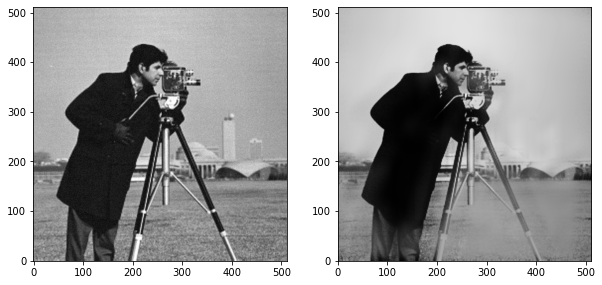

In [16]:
from skimage.restoration import denoise_bilateral
from skimage import img_as_float
ima = img_as_float(camera()[-1::-1])
#add noise
noisy = np.clip(ima+.1*np.random.random(ima.shape),0,1)
bilat = denoise_bilateral(noisy, sigma_spatial=15,multichannel=False)

compare(255*noisy,255*bilat)

>see also:
* bi-lateral filtering [Paris08](../00-Preface/06-References.ipynb#[Paris08])

## Anisotropic filter
### Nagao
This is an edge preserving smoothing.

* one define 5 anisotropic 5x5 complementary filters (<>directions)
* mean and variance are computed on filter
* filtered value is the mean of the lowest variance filter

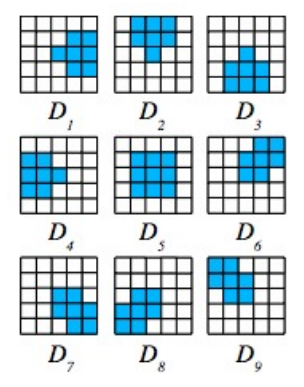

In [17]:
Image('http://homepages.ulb.ac.be/~odebeir/data/nagao.png')

>see also:
* Edge preserving smoothing. Makoto Nagao and Takashi Matsuyama. Computer Graphics and Image Processing. Volume 9, Issue 4, April 1979, Pages 394-407
* Rotating filter [IPAMV](../00-Preface/06-References.ipynb#[IPAMV]) pp72

### Diffusion filter

* smoothing is formulated as a diffusive process
* smoothing is performed at intra regions
* and suppressed at region boundaries

the iteration is given by:

$$I_t = div\big(D(|\nabla I|)\nabla u\big)$$ 

where $I_t$ is the time derivative of $I$, the image, $D$ is a diffusion function and $\nabla$ denotes the gradient.

Diffusion function can be defined such as:
$$ D(\nabla I) = e^{-(\nabla I / k)^2}$$

or

$$ D(\nabla I) = \frac{1}{1+(\frac{\nabla I}{k})^2}$$

Solution is found using an iterative approach on the discretized image grid (e.g. for 3D volume):

$$I_{x,y,z}^{t+1} = I_{x,y,z}^{t} + \lambda \sum_{R=1}^{6} \big[ D(\nabla _R I) \nabla _R I \big]$$

and the gradient evaluated via finite differences:

$$
\nabla _1 I_{x,y,z} = I_{x-1,y,z} - I_{x,y,z}, \\
\nabla _2 I_{x,y,z} = I_{x+1,y,z} - I_{x,y,z}, \\
\nabla _3 I_{x,y,z} = I_{x,y-1,z} - I_{x,y,z}, \\
\nabla _4 I_{x,y,z} = I_{x,y+1,z} - I_{x,y,z}, \\
\nabla _5 I_{x,y,z} = I_{x,y,z-1} - I_{x,y,z}, \\
\nabla _6 I_{x,y,z} = I_{x,y,z+1} - I_{x,y,z}, \\
$$

The following figure illustrates the application of the diffusion function:

$$ D(\nabla I) = e^{-(\nabla I / k)^2}$$

after a few iterations, the noise is removed while the heavy borders are conserved.

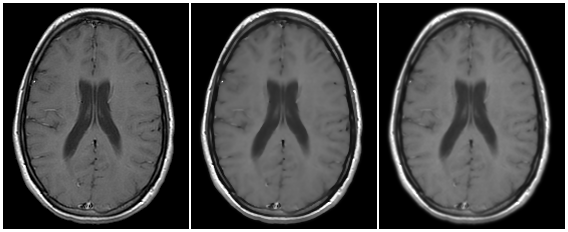

In [18]:
Image('https://imagej.net/_images/b/b7/Filters-examples.png')

Question:
* what is the equivallent iteration for a 2D image?

>see also:
* Ovidiu Ghita, Kevin Robinson, Michael Lynch, Paul F. Whelan . MRI diffusion-based
filtering: a note on performance characterisation. Computerized Medical Imaging and Graphics 29 (2005) 267–277
* diffusion based edge detection [IVP](../00-Preface/06-References.ipynb#[IVP]) p433, [HCVA](../00-Preface/06-References.ipynb#[HCVA]) vol2 p425
* Pietro Perona and Jitendra Malik (July 1990). "Scale-space and edge
detection using anisotropic diffusion". IEEE Transactions on Pattern Analysis
and Machine Intelligence, 12 (7): 629–639

## Non-local image denoising

* filtered image is a weighted mean of pixels belonging to the “neighboorhood”
* similarity between pixel i and j is function of there local gray level distribution, the pixels with a similar grey level neighbourhood have larger weights in the average

$$f_{new}(p) = \frac{1}{W(p)} \sum_{q \in N(p)}  w(p,q) f(q)$$

with

$$ W(p) = \sum_{q \in N(p)} w(p,q)$$

* generalized distance defined as the weighted Euclidian distance between two i,j surrounding pixels 

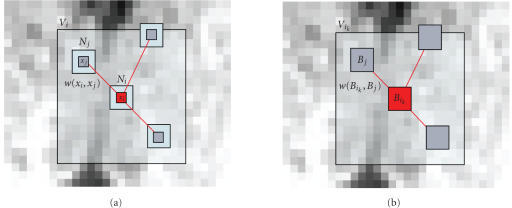

In [19]:
Image('http://openi.nlm.nih.gov/imgs/512/290/2292807/2292807_IJBI2008-590183.001.png')

In [20]:
#Image('http://deliveryimages.acm.org/10.1145/1950000/1941513/figs/f4.jpg')
Image('http://deliveryimages.acm.org/10.1145/1950000/1941513/figs/f4.jpg',embed=False)


<sup>[image source](http://deliveryimages.acm.org/10.1145/1950000/1941513/figs/f4.jpg)

>see also:
* A non-local algorithm for image denoising [Buades05](../00-Preface/06-References.ipynb#[Buades05])